<a href="https://colab.research.google.com/github/Sheila-Otieno/Data-analysis/blob/main/Gas_price_future_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Nat_Gas (1).csv to Nat_Gas (1) (1).csv


In [8]:
data = pd.read_csv('Nat_Gas (1) (1).csv')

In [9]:
data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


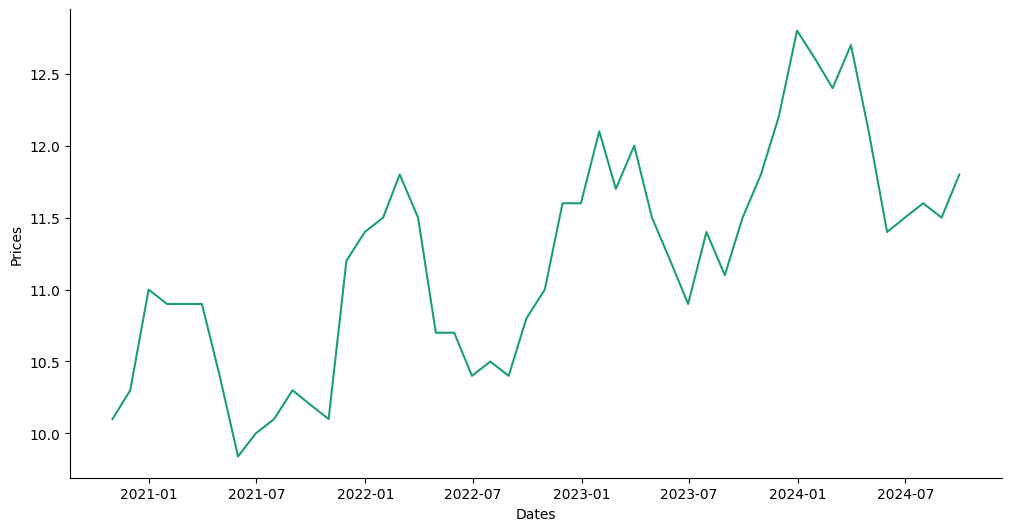

In [15]:
# @title Dates vs Prices

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Prices']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Prices')

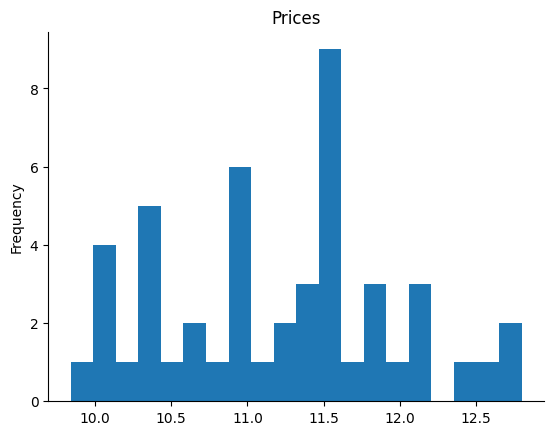

In [14]:
# @title Prices

from matplotlib import pyplot as plt
data['Prices'].plot(kind='hist', bins=20, title='Prices')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [11]:
data['Dates'] = pd.to_datetime(data['Dates'])

<ipython-input-11-c4b63a4f535a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [27]:
# Load historical gas price data (make sure to provide the correct path to your dataset)
# The CSV should have 'date' and 'price' columns
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Dates'] = pd.to_datetime(data['Dates'])
    return data

In [29]:
# Train model on historical data
def train_model(data):
    data['date_ordinal'] = data['Dates'].map(datetime.toordinal)
    X = data['date_ordinal'].values.reshape(-1, 1)
    y = data['Prices'].values

    model = LinearRegression()
    model.fit(X, y)
    return model

In [18]:
# Estimate price based on the model for a given date
def estimate_price(date, model):
    date_ordinal = datetime.toordinal(pd.to_datetime(date))
    estimated_price = model.predict(np.array([[date_ordinal]]))
    return estimated_price[0]# Estimate price based on the model for a given date


In [19]:
# Extrapolate future prices
def extrapolate_future_prices(model, start_date, num_days=365):
    future_dates = [start_date + timedelta(days=i) for i in range(num_days)]
    future_dates_ordinal = [date.toordinal() for date in future_dates]

    future_prices = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))
    return future_dates, future_prices


<ipython-input-27-bad27b6bd344>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


Estimated Gas Price on 2024-09-30: $12.12


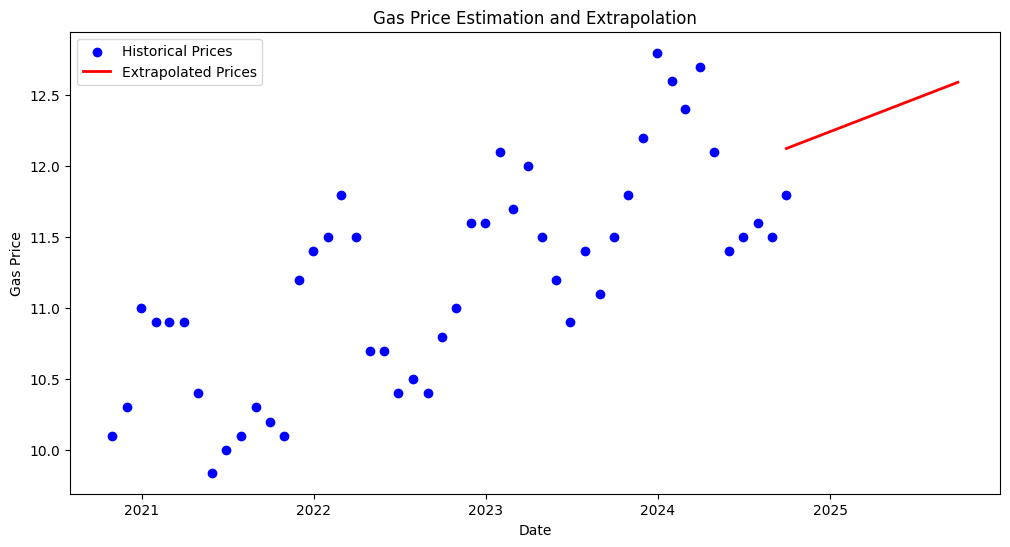

In [31]:
file_path = 'Nat_Gas (1) (1).csv'  # Provide the path to your historical data
input_date = '2024-09-30'  # Input the date for price estimate

# Main function to estimate and extrapolate gas prices
def main(file_path, input_date):
    data = load_data(file_path)
    model = train_model(data)

    # Estimate price on the input date
    estimated_price = estimate_price(input_date, model)
    print(f"Estimated Gas Price on {input_date}: ${estimated_price:.2f}")

    # Extrapolate prices for the next year
    start_date = pd.to_datetime(input_date)
    future_dates, future_prices = extrapolate_future_prices(model, start_date)

    # Plotting the result
    plt.figure(figsize=(12, 6))
    plt.scatter(data['Dates'], data['Prices'], color='blue', label='Historical Prices')
    plt.plot(future_dates, future_prices, color='red', label='Extrapolated Prices', linewidth=2)
    plt.title('Gas Price Estimation and Extrapolation')
    plt.xlabel('Date')
    plt.ylabel('Gas Price')
    plt.legend()
    plt.show()



main(file_path, input_date)